In [136]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, explained_variance_score, confusion_matrix, mean_absolute_error

In [137]:
data = pd.read_csv("./assignment_basket.csv")
data = data.dropna()
data.head(20)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
5,3,Cookies,30-10-2016 10:07,morning,weekend
6,4,Muffin,30-10-2016 10:08,morning,weekend
7,5,Coffee,30-10-2016 10:13,morning,weekend
8,5,Pastry,30-10-2016 10:13,morning,weekend
9,5,Bread,30-10-2016 10:13,morning,weekend


1. (Association rules analysis, 15 points) You have to perform market basket analysis using the
data from ’assignment basket.csv’. The file includes shopping data, with additional info on the
period of day and whether the transaction happened on a weekday or during the weekend. The
data is in the format we have encountered before: we have several rows for each transaction, one
row for each item. Before you create the association rules, check what are the most frequently
sold items. Are the most frequent items the same on a weekday and in the weekend? What can
you say about afternoons and mornings?

In [138]:
data.columns

Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')

In [139]:
data.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [140]:

basket_weekday = (data[data['weekday_weekend'] =="weekday"]
            .groupby(['Transaction', 'period_day'])['Item']
            .sum().unstack().reset_index().fillna(0)
            .set_index('Transaction'))

basket_weekend = (data[data['weekday_weekend'] =="weekend"]
            .groupby(['Transaction', 'period_day'])['Item']
            .sum().unstack().reset_index().fillna(0)
            .set_index('Transaction'))
basket_weekday

period_day,afternoon,evening,morning,night
Transaction,,,,
81,0,0,CoffeeCake,0
82,0,0,TartineBread,0
83,0,0,CoffeeBread,0
84,0,0,Bread,0
85,0,0,CoffeeCoffeePastryMedialuna,0
...,...,...,...,...
9546,CoffeeScone,0,0,0
9547,Coke,0,0,0
9548,CoffeeCoffeeAlfajores,0,0,0


In [141]:
def hot_encode(x):
    print(type(x), x)
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

In [142]:
# Encoding the datasets
basket_encoded = pd.get_dummies(basket_weekend)
# basket_encoded = basket_weekday.applymap(hot_encode)
basket_weekday = basket_encoded


# basket_encoded = basket_weekend.applymap(hot_encode)
basket_encoded = pd.get_dummies(basket_weekend)
basket_weekend = basket_encoded

In [143]:
basket_weekday

,afternoon_0,afternoon_Afternoon with the baker,afternoon_Alfajores,afternoon_AlfajoresAlfajores,afternoon_AlfajoresAlfajoresCoffee,afternoon_AlfajoresAlfajoresCoffeeCoffeeCoffee,afternoon_AlfajoresAlfajoresTea,afternoon_AlfajoresBread,afternoon_AlfajoresBreadMy-5 Fruit ShootJuice,afternoon_AlfajoresBreadTea,...,morning_Truffles,morning_TrufflesBreadCoffee,morning_TrufflesCoffeeThe Nomad,morning_Vegan mincepie,morning_Vegan mincepieCake,morning_Vegan mincepieCakeCoffeeCoffeeCoffee,night_0,night_Hot chocolateHot chocolate,night_Scandinavian,night_Vegan Feast
Transaction,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


1.1 Do the extracted rules seem to contain useful information or only trivial observations (do
you mostly see the items that are the most frequent in general)?

In [144]:
# Building the model
frq_items = apriori(basket_weekday, min_support = 0.03, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
106,(morning_Bread),"(night_0, afternoon_0, evening_0)",0.064157,0.438253,0.064157,1.0,2.281787,0.036040,inf
120,(morning_Coffee),"(night_0, afternoon_0, evening_0)",0.042169,0.438253,0.042169,1.0,2.281787,0.023688,inf
27,(morning_Bread),"(afternoon_0, evening_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf
33,(morning_Coffee),"(afternoon_0, evening_0)",0.042169,0.440964,0.042169,1.0,2.267760,0.023574,inf
100,"(morning_Bread, night_0)","(afternoon_0, evening_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf


In [145]:
frq_items.head()

,support,itemsets
0,0.468675,(afternoon_0)
1,0.053614,(afternoon_Bread)
2,0.036747,(afternoon_Coffee)
3,0.972289,(evening_0)
4,0.561747,(morning_0)


1.2 What would you recommend to a person (i.e. what is the consequent in association rules
terminology) when you know that in the basket there is already (i) Eggs, and the purchase
is in the morning, (ii) Coke and Juice, and the purchase is in the afternoon, (iii) Toast,
either in the morning or in the afternoon?

In [146]:
frq_items = apriori(basket_weekend, min_support = 0.03, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
106,(morning_Bread),"(night_0, afternoon_0, evening_0)",0.064157,0.438253,0.064157,1.0,2.281787,0.036040,inf
120,(morning_Coffee),"(night_0, afternoon_0, evening_0)",0.042169,0.438253,0.042169,1.0,2.281787,0.023688,inf
27,(morning_Bread),"(afternoon_0, evening_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf
33,(morning_Coffee),"(afternoon_0, evening_0)",0.042169,0.440964,0.042169,1.0,2.267760,0.023574,inf
100,"(morning_Bread, night_0)","(afternoon_0, evening_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf


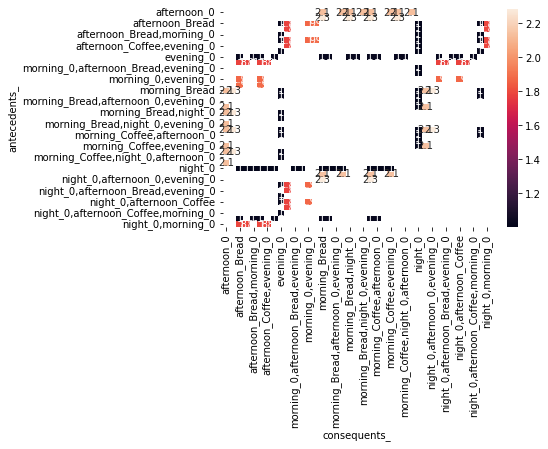

In [147]:
# Replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

pivot = rules.pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

2. (Classification, 25 points) In this exercise you have to work with the data in the file ’patients.csv’,
that contains some measurements about patients, who experienced angina, which can typically
be a symptom of coronary artery disease (maybe familiar from BAI). You can find the following
variables in the data:


In [148]:
data = pd.read_csv("./patients.csv")
data.head()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             303 non-null    int64
 1   gender          303 non-null    int64
 2   pain            303 non-null    int64
 3   blood_pressure  303 non-null    int64
 4   cholesterol     303 non-null    int64
 5   blood_sugar     303 non-null    int64
 6   heart_rate      303 non-null    int64
 7   exercise        303 non-null    int64
 8   outcome         303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB


In [150]:
data.describe()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,1.000000


In [151]:
data.dtypes

age               int64
gender            int64
pain              int64
blood_pressure    int64
cholesterol       int64
blood_sugar       int64
heart_rate        int64
exercise          int64
outcome           int64
dtype: object

<AxesSubplot:>

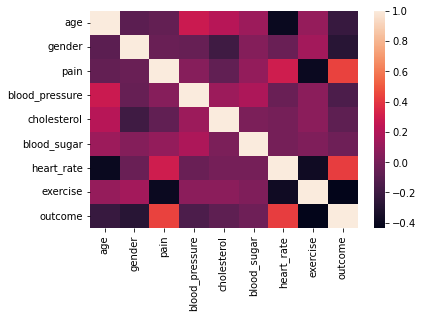

In [152]:
sns.heatmap(data.corr())

In [153]:
# Calculating correlation between outcome and other variables
corrs = data.corr()['outcome'][["age","gender","pain","blood_pressure","cholesterol","blood_sugar","heart_rate","exercise",]]

corrs

age              -0.225439
gender           -0.280937
pain              0.433798
blood_pressure   -0.144931
cholesterol      -0.085239
blood_sugar      -0.028046
heart_rate        0.421741
exercise         -0.436757
Name: outcome, dtype: float64

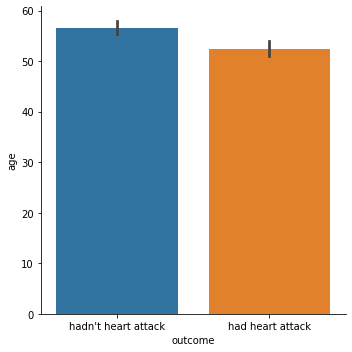

In [154]:
a = sns.catplot(
        data=data,
        y="age", x="outcome", 
        kind="bar")

a.set_xticklabels([ "hadn't heart attack","had heart attack"])
plt.show()

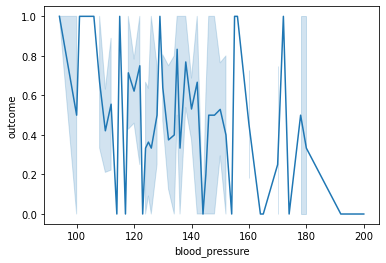

In [155]:
sns.lineplot(data=data, x="blood_pressure", y="outcome")
plt.show()


2.1To run the classification models, create training and test sets (25% test set)

In [156]:
# list of columns which will be removed from training.
target_col = ['outcome']

X = data.drop( target_col , axis=1)
Y = data.outcome

# split the dataset into training(75%) and testing(25%).
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0) 


2.2 Create a baseline model as a logistic regression without any parameter optimization. What
is the accuracy you can achieve?

In [157]:
# Create the model
model = LogisticRegression()

# build the model
model.fit(X_train, Y_train)

# predict the model with testing data 
Y_test_predction = model.predict(X_test)


accuracy = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)
### track the best accuracy and the model name
best_accuracy = accuracy
best_predictor = "LogisticRegression"

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:", accuracy)

Train data accuracy: 0.8061674008810573
Test data accuracy: 0.7763157894736842


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2.3 Create models by optimizing the parameters of (i) decision trees, (ii) bagging, and (iii)
random forest classifiers. What is the best accuracy you can achieve across all the models?

In [158]:
# Create Decision Tree classifer object

fractions = [0,0.1,0.2101,0.3,0.4,0.5]

best_accuracy = 0
fraction_no = 0
model

for i in fractions:

    model = DecisionTreeClassifier(criterion='entropy', splitter='random', min_weight_fraction_leaf=i, random_state=None)
    model = model.fit(X_train,Y_train)
    Y_test_predction = model.predict(X_test)
    score = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)
    if best_accuracy < score:
        best_accuracy = score
        fraction_no = i


print(f"fraction is {fraction_no}")
model = DecisionTreeClassifier(criterion='entropy',splitter='random', min_weight_fraction_leaf=fraction_no, random_state=None)

model = model.fit(X_train,Y_train)
Y_test_predction = model.predict(X_test)

accuracy = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)

### track the best accuracy and the model name
if best_accuracy < accuracy:
    best_accuracy = accuracy
    best_predictor = "DecisionTreeClassifier"

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:", accuracy)
    

fraction is 0.4
Train data accuracy: 0.7577092511013216
Test data accuracy: 0.7631578947368421


In [159]:
bagg = BaggingClassifier(
                            base_estimator=SVC(), 
                            n_estimators=100,
                            max_samples=100,
                            random_state=1, 
                            n_jobs=3
                        )
model = bagg.fit(X_train, Y_train)
Y_test_predction = model.predict(X_test)

accuracy = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)
### track the best accuracy and the model name
if best_accuracy < accuracy:
    best_accuracy = accuracy
    best_predictor = "BaggingClassifier"

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:", accuracy)

Train data accuracy: 0.6123348017621145
Test data accuracy: 0.7105263157894737


In [160]:
model =RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

Y_test_predction = model.predict(X_test)


accuracy = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)
### track the best accuracy and the model name
if best_accuracy < accuracy:
    best_accuracy = accuracy
    best_predictor = "RandomForestClassifier"

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:", accuracy)
    

Train data accuracy: 1.0
Test data accuracy: 0.7368421052631579


In [161]:
print(f"Best predictor {best_predictor}")
print(f"Best accuracy {best_accuracy}")

Best predictor LogisticRegression
Best accuracy 0.7631578947368421


2.4  What are the four most important predictors according to the best decision tree model?
Create a new decision tree model that uses only those four variables as predictors. What
is the best accuracy you can achieve using only the four variables?

In [162]:

# list of columns which will be removed from training.
target_col = ['outcome']

X = data[["age","pain", "blood_sugar", "blood_pressure"]]
Y = data.outcome

# split the dataset into training(75%) and testing(25%).
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0) 

fractions = [0,0.1,0.18,0.25,0.3,0.4,0.5]

best_accuracy = 0
fraction_no = 0
model

for i in fractions:

    model = DecisionTreeClassifier(criterion='gini', splitter='best', min_weight_fraction_leaf=i, random_state=0)
    model = model.fit(X_train,Y_train)
    Y_test_predction = model.predict(X_test)
    score = accuracy_score(y_true = Y_test, y_pred = Y_test_predction)
    if best_accuracy < score:
        best_accuracy = score
        fraction_no = i


print(f"fraction is {fraction_no}")
model = DecisionTreeClassifier(criterion='gini',splitter='best', min_weight_fraction_leaf=fraction_no, random_state=0)

model = model.fit(X_train,Y_train)
Y_test_predction = model.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = Y_test, y_pred = Y_test_predction))
    

fraction is 0.1
Train data accuracy: 0.7577092511013216
Test data accuracy: 0.7631578947368421


3 (Regression, 10 points) In this exercise, you will perform tasks faced by a data scientist working
in the real estate industry. Your job is to build a predictive model to estimate selling price for
houses. You can find more details about the dataset (House assignment.csv), at the following

In [163]:
data = pd.read_csv("./House_assignment.csv")
data.head()

,Unnamed: 0,Area,Rooms,Yard,Floors,Owners,Year,Basement,Attic,Garage,Storage,Guest,Price
0,0,75523,3,0,63,8,2005,4313,9005,956,0,7,7559081.5
1,1,80771,39,1,98,6,2015,3653,2436,128,1,2,8085989.5
2,2,55712,58,0,19,8,2021,2937,8852,135,1,9,5574642.1
3,3,32316,47,0,6,4,2012,659,7141,359,0,3,3232561.2
4,4,70429,19,1,90,7,1990,8435,2429,292,1,4,7055052.0


3.1 Exploratory data analysis: try to understand the different variables in the data. Identify
the variables, based on exploratory data analysis methods (similar as in the previous task),
that you think have an effect on the price of the house

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   Area        10000 non-null  int64  
 2   Rooms       10000 non-null  int64  
 3   Yard        10000 non-null  int64  
 4   Floors      10000 non-null  int64  
 5   Owners      10000 non-null  int64  
 6   Year        10000 non-null  int64  
 7   Basement    10000 non-null  int64  
 8   Attic       10000 non-null  int64  
 9   Garage      10000 non-null  int64  
 10  Storage     10000 non-null  int64  
 11  Guest       10000 non-null  int64  
 12  Price       10000 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 1015.8 KB


In [165]:
data.describe()

,Unnamed: 0,Area,Rooms,Yard,Floors,Owners,Year,Basement,Attic,Garage,Storage,Guest,Price
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,4999.50000,49870.13120,50.358400,0.508700,50.276300,5.521700,2005.48850,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,2886.89568,28774.37535,28.816696,0.499949,28.889171,2.856667,9.30809,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,0.00000,89.00000,1.000000,0.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,2499.75000,25098.50000,25.000000,0.000000,25.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,4999.50000,50105.50000,50.000000,1.000000,50.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,7499.25000,74609.75000,75.000000,1.000000,76.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,9999.00000,99999.00000,100.000000,1.000000,100.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [166]:
data.dtypes

Unnamed: 0      int64
Area            int64
Rooms           int64
Yard            int64
Floors          int64
Owners          int64
Year            int64
Basement        int64
Attic           int64
Garage          int64
Storage         int64
Guest           int64
Price         float64
dtype: object

<AxesSubplot:>

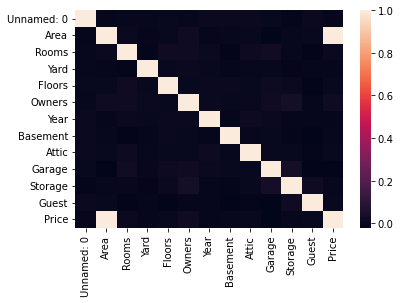

In [167]:
sns.heatmap(data.corr())

In [168]:

for value in data:
    print('For {},{} unique values present'.format(value,data[value].nunique()))

For Unnamed: 0,10000 unique values present
For Area,9483 unique values present
For Rooms,100 unique values present
For Yard,2 unique values present
For Floors,100 unique values present
For Owners,10 unique values present
For Year,32 unique values present
For Basement,6352 unique values present
For Attic,6267 unique values present
For Garage,901 unique values present
For Storage,2 unique values present
For Guest,11 unique values present
For Price,10000 unique values present


In [169]:
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,Area,Rooms,Yard,Floors,Owners,Year,Basement,Attic,Garage,Storage,Guest,Price
0,75523,3,0,63,8,2005,4313,9005,956,0,7,7559081.5
1,80771,39,1,98,6,2015,3653,2436,128,1,2,8085989.5
2,55712,58,0,19,8,2021,2937,8852,135,1,9,5574642.1
3,32316,47,0,6,4,2012,659,7141,359,0,3,3232561.2
4,70429,19,1,90,7,1990,8435,2429,292,1,4,7055052.0


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


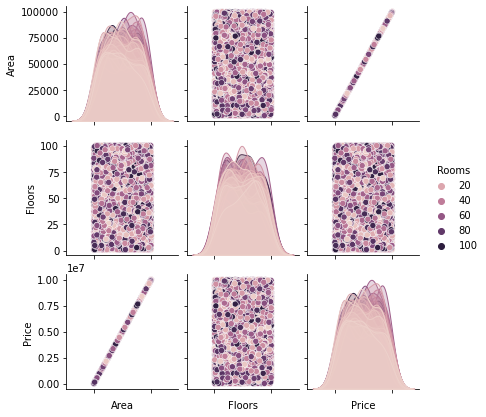

In [170]:
g = sns.pairplot(data[["Area","Rooms","Floors", "Price"]]
                    ,hue='Rooms',height=2)
g.set(xticklabels=[])


<AxesSubplot:xlabel='Guest', ylabel='Price'>

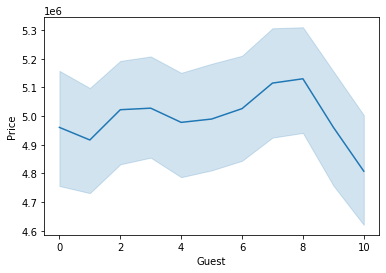

In [171]:
sns.lineplot(data=data, y="Price", x="Guest")

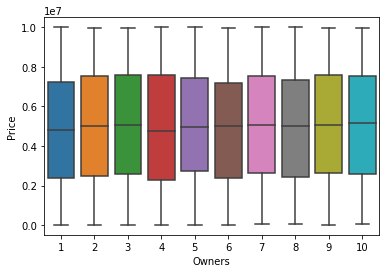

In [172]:
sns.boxplot(y='Price', x='Owners', data=data)
plt.show()

3.2 Develop a decision tree regression model that the company can use to predict the selling
price for new houses on the market. Try to optimize the parameters. What is the best
MSE that you can achieve?

In [173]:
# X(Independent variables) and y(target variables) 
X = data.iloc[:,1:].values
y = data.iloc[:,0].values


In [174]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [176]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)
model.score(X_test,y_test)

print("Decision tree Regression Model Score is ",round(model.score(X_test,y_test)*100))

Decision tree Regression Model Score is  100


In [177]:
model.score(X, y)
predicted_home_prices = model.predict(X)
mean_absolute_error(y, predicted_home_prices)

10.8309